In [114]:
import pandas as pd
import datetime
import numpy as np

##### Deep learning

##### ANN with Pytorch


##### Feature engineering
Categorial --- Embedding layer
Continous variable

##### pythonic class to create NN  Feed forward



In [115]:
df = pd.read_csv('houseprice.csv')

In [116]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
df.shape

(1460, 81)

In [118]:
df = df[['MSSubClass','MSZoning','LotFrontage', 'Street','LotShape','YearBuilt', '1stFlrSF','2ndFlrSF','SalePrice']]


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
MSSubClass     1460 non-null int64
MSZoning       1460 non-null object
LotFrontage    1201 non-null float64
Street         1460 non-null object
LotShape       1460 non-null object
YearBuilt      1460 non-null int64
1stFlrSF       1460 non-null int64
2ndFlrSF       1460 non-null int64
SalePrice      1460 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 102.7+ KB


In [119]:
for i in df.columns:
    print("Column name {} has {} unique values".format(i,len(df[i].unique())))

Column name MSSubClass has 15 unique values
Column name MSZoning has 5 unique values
Column name LotFrontage has 111 unique values
Column name Street has 2 unique values
Column name LotShape has 4 unique values
Column name YearBuilt has 112 unique values
Column name 1stFlrSF has 753 unique values
Column name 2ndFlrSF has 417 unique values
Column name SalePrice has 663 unique values


In [120]:

yearnow = datetime.datetime.now().year

In [121]:
df['Total Years'] = yearnow - df['YearBuilt']

In [122]:
df['Total Years'].head()

0     21
1     48
2     23
3    109
4     24
Name: Total Years, dtype: int64

In [123]:
df.drop('YearBuilt',axis=1,inplace = True)

In [124]:
### Creating categorical features

cat_features = ['MSSubClass', 'MSZoning','Street','LotShape']

out_features = ['SalePrice']


In [125]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

lbl_encoders ={}

lbl_encoders['MSSubClass']   =  LabelEncoder()
lbl_encoders['MSSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [126]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [127]:
from sklearn.preprocessing import LabelEncoder

lbl_encoders ={}

for feature in cat_features:
    lbl_encoders[feature]   =  LabelEncoder()
    df[feature] = lbl_encoders[feature].fit_transform(df[feature])

In [128]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,1,3,856,854,208500,21
1,0,3,80.0,1,3,1262,0,181500,48


In [129]:
cat_feature = np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1 )
cat_feature

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [130]:
import torch

cat_feature = torch.tensor(cat_feature,dtype=torch.int64)

In [131]:
#### Treating continous values

In [132]:
cont_features = []

for i in df.columns:
    if i not in ['LotFrontage', 'LotArea','1stFlrSF', '2ndFlrSF',  'Total Years']:
        pass
    else:
        cont_features.append(i)

In [133]:
cont_features

['LotFrontage', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [134]:
## stacking cont variable to a tensor

cont_variable =  np.stack([df[i].values for i in cont_features],axis = 1)
cont_variable = torch.tensor(cont_variable,dtype=torch.float)
cont_variable

tensor([[  65.,  856.,  854.,   21.],
        [  80., 1262.,    0.,   48.],
        [  68.,  920.,  866.,   23.],
        ...,
        [  66., 1188., 1152.,   83.],
        [  68., 1078.,    0.,   74.],
        [  75., 1256.,    0.,   59.]])

In [135]:
cont_variable.dtype

torch.float32

In [136]:
y = torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)

In [137]:
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
MSSubClass     1460 non-null int64
MSZoning       1460 non-null int32
LotFrontage    1201 non-null float64
Street         1460 non-null int32
LotShape       1460 non-null int32
1stFlrSF       1460 non-null int64
2ndFlrSF       1460 non-null int64
SalePrice      1460 non-null int64
Total Years    1460 non-null int64
dtypes: float64(1), int32(3), int64(5)
memory usage: 85.6 KB


In [139]:
cat_feature.shape,cont_variable.shape,y.shape

(torch.Size([1460, 4]), torch.Size([1460, 4]), torch.Size([1460, 1]))

In [140]:
#####   EMBEDDING SIZE FOR CATEGORICAL VARIABLE

In [141]:
cat_dims = [len(df[cols].unique()) for cols in ['MSSubClass', 'MSZoning', 'Street', 'LotShape']]

In [142]:
cat_dims

[15, 5, 2, 4]

#### THUMPS RULE TO SET OUTPUT DIMENSION BASED ON INPUT DIM

##### input feature numbers + 1 and // 2     not more tthan 50

In [143]:
embedding_dim = [(x, min(50, (x+1)// 2)) for x in cat_dims]

In [144]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [145]:
import torch.nn as nn
import torch.nn.functional as F
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [146]:
cat_feature

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [147]:
#cat_feature = cat_feature[:4]

In [148]:
cat_feature

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [149]:
pd.set_option('display.max_rows',500)
embedding_val=[]

In [150]:
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_feature[:,i]))

In [151]:
embedding_val

[tensor([[ 1.2183, -0.1019, -0.5225,  ...,  0.1635,  1.8438, -0.2426],
         [ 0.2639,  1.0908, -0.3652,  ..., -0.3927,  2.3561, -1.0678],
         [ 1.2183, -0.1019, -0.5225,  ...,  0.1635,  1.8438, -0.2426],
         ...,
         [ 0.4322, -0.3227,  1.0355,  ..., -1.4795,  0.1584,  0.0389],
         [ 0.2639,  1.0908, -0.3652,  ..., -0.3927,  2.3561, -1.0678],
         [ 0.2639,  1.0908, -0.3652,  ..., -0.3927,  2.3561, -1.0678]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0659,  0.8124, -0.6910],
         [-0.0659,  0.8124, -0.6910],
         [-0.0659,  0.8124, -0.6910],
         ...,
         [-0.0659,  0.8124, -0.6910],
         [-0.0659,  0.8124, -0.6910],
         [-0.0659,  0.8124, -0.6910]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.8636],
         [0.8636],
         [0.8636],
         ...,
         [0.8636],
         [0.8636],
         [0.8636]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.3932, -1.0638],
         [ 1.3932, -1.0638],
         [-0.2545,  0.4102],

In [152]:
z = torch.cat(embedding_val,1)
z

tensor([[ 1.2183, -0.1019, -0.5225,  ...,  0.8636,  1.3932, -1.0638],
        [ 0.2639,  1.0908, -0.3652,  ...,  0.8636,  1.3932, -1.0638],
        [ 1.2183, -0.1019, -0.5225,  ...,  0.8636, -0.2545,  0.4102],
        ...,
        [ 0.4322, -0.3227,  1.0355,  ...,  0.8636,  1.3932, -1.0638],
        [ 0.2639,  1.0908, -0.3652,  ...,  0.8636,  1.3932, -1.0638],
        [ 0.2639,  1.0908, -0.3652,  ...,  0.8636,  1.3932, -1.0638]],
       grad_fn=<CatBackward0>)

In [153]:
dropout = nn.Dropout(.4)

In [154]:
final_embed = dropout(z)
final_embed

tensor([[ 2.0304, -0.1699, -0.8708,  ...,  1.4393,  0.0000, -1.7731],
        [ 0.0000,  1.8179, -0.6087,  ...,  1.4393,  0.0000, -1.7731],
        [ 0.0000, -0.1699, -0.8708,  ...,  0.0000, -0.4241,  0.6836],
        ...,
        [ 0.7203, -0.5379,  0.0000,  ...,  1.4393,  0.0000, -1.7731],
        [ 0.0000,  1.8179, -0.6087,  ...,  1.4393,  2.3221, -0.0000],
        [ 0.4398,  1.8179, -0.6087,  ...,  0.0000,  0.0000, -0.0000]],
       grad_fn=<MulBackward0>)

####  Creatinng the feed forwwardr NN

In [155]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):
    
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p = 0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace = True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [156]:
len(cont_features)

4

In [157]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p = 0.4)

In [158]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=18, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [159]:
#### Defining loss and optimizer

In [160]:
model.parameters

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=18, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [161]:
loss_function = nn.MSELoss()

optimizer= torch.optim.Adam(model.parameters(),lr= 0.01)

In [162]:
df.shape

(1460, 9)

In [163]:
cont_variable

tensor([[  65.,  856.,  854.,   21.],
        [  80., 1262.,    0.,   48.],
        [  68.,  920.,  866.,   23.],
        ...,
        [  66., 1188., 1152.,   83.],
        [  68., 1078.,    0.,   74.],
        [  75., 1256.,    0.,   59.]])

In [164]:
cont_variable.shape

torch.Size([1460, 4])

In [165]:
batch_size = 1460
test_size = int(batch_size* 0.15)

train_categorical = cat_feature[:batch_size-test_size]

test_categorical = cat_feature[batch_size-test_size:batch_size]
                                
train_cont = cont_variable[:batch_size-test_size]

test_cont = cont_variable[batch_size-test_size:batch_size]


y_train = y[:batch_size-test_size]

y_test = y[batch_size-test_size:batch_size]

In [166]:
len(test_categorical),len(test_cont),len(train_cont),len(y_test),len(y_train),len(train_categorical)

(219, 219, 1241, 219, 1241, 1241)

In [167]:
cat_feature

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [173]:
epochs = 5000

final_losses = []
for i in range(epochs):
    
    i += 1
    y_pred = model(train_categorical,train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train))
    final_losses.append(loss)
    if i%10 == 1:
        
        print("Epochs num: {} and the loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs num: 1 and the loss: nan
Epochs num: 11 and the loss: nan
Epochs num: 21 and the loss: nan
Epochs num: 31 and the loss: nan
Epochs num: 41 and the loss: nan
Epochs num: 51 and the loss: nan
Epochs num: 61 and the loss: nan
Epochs num: 71 and the loss: nan
Epochs num: 81 and the loss: nan
Epochs num: 91 and the loss: nan
Epochs num: 101 and the loss: nan
Epochs num: 111 and the loss: nan
Epochs num: 121 and the loss: nan
Epochs num: 131 and the loss: nan
Epochs num: 141 and the loss: nan
Epochs num: 151 and the loss: nan
Epochs num: 161 and the loss: nan
Epochs num: 171 and the loss: nan
Epochs num: 181 and the loss: nan
Epochs num: 191 and the loss: nan
Epochs num: 201 and the loss: nan
Epochs num: 211 and the loss: nan
Epochs num: 221 and the loss: nan
Epochs num: 231 and the loss: nan
Epochs num: 241 and the loss: nan
Epochs num: 251 and the loss: nan
Epochs num: 261 and the loss: nan
Epochs num: 271 and the loss: nan
Epochs num: 281 and the loss: nan
Epochs num: 291 and the l

Epochs num: 2391 and the loss: nan
Epochs num: 2401 and the loss: nan
Epochs num: 2411 and the loss: nan
Epochs num: 2421 and the loss: nan
Epochs num: 2431 and the loss: nan
Epochs num: 2441 and the loss: nan
Epochs num: 2451 and the loss: nan
Epochs num: 2461 and the loss: nan
Epochs num: 2471 and the loss: nan
Epochs num: 2481 and the loss: nan
Epochs num: 2491 and the loss: nan
Epochs num: 2501 and the loss: nan
Epochs num: 2511 and the loss: nan
Epochs num: 2521 and the loss: nan
Epochs num: 2531 and the loss: nan
Epochs num: 2541 and the loss: nan
Epochs num: 2551 and the loss: nan
Epochs num: 2561 and the loss: nan
Epochs num: 2571 and the loss: nan
Epochs num: 2581 and the loss: nan
Epochs num: 2591 and the loss: nan
Epochs num: 2601 and the loss: nan
Epochs num: 2611 and the loss: nan
Epochs num: 2621 and the loss: nan
Epochs num: 2631 and the loss: nan
Epochs num: 2641 and the loss: nan
Epochs num: 2651 and the loss: nan
Epochs num: 2661 and the loss: nan
Epochs num: 2671 and

Epochs num: 4741 and the loss: nan
Epochs num: 4751 and the loss: nan
Epochs num: 4761 and the loss: nan
Epochs num: 4771 and the loss: nan
Epochs num: 4781 and the loss: nan
Epochs num: 4791 and the loss: nan
Epochs num: 4801 and the loss: nan
Epochs num: 4811 and the loss: nan
Epochs num: 4821 and the loss: nan
Epochs num: 4831 and the loss: nan
Epochs num: 4841 and the loss: nan
Epochs num: 4851 and the loss: nan
Epochs num: 4861 and the loss: nan
Epochs num: 4871 and the loss: nan
Epochs num: 4881 and the loss: nan
Epochs num: 4891 and the loss: nan
Epochs num: 4901 and the loss: nan
Epochs num: 4911 and the loss: nan
Epochs num: 4921 and the loss: nan
Epochs num: 4931 and the loss: nan
Epochs num: 4941 and the loss: nan
Epochs num: 4951 and the loss: nan
Epochs num: 4961 and the loss: nan
Epochs num: 4971 and the loss: nan
Epochs num: 4981 and the loss: nan
Epochs num: 4991 and the loss: nan


In [171]:
train_categorical

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [0, 3, 1, 3],
        [0, 3, 1, 0],
        [5, 3, 1, 3]])

In [172]:
train_cont

tensor([[  65.,  856.,  854.,   21.],
        [  80., 1262.,    0.,   48.],
        [  68.,  920.,  866.,   23.],
        ...,
        [  63., 1141.,    0.,   19.],
        [  64., 1484.,    0.,   18.],
        [  65.,  884.,  884.,   21.]])

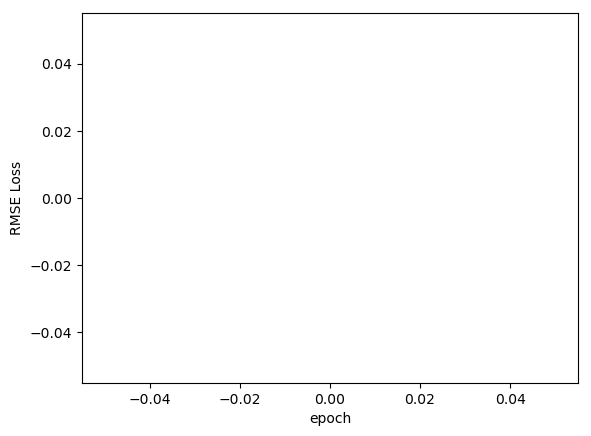

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [175]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: nan


In [176]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted

,Prediction
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [177]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,248328.0,NaN,NaN
1,170000.0,NaN,NaN
2,465000.0,NaN,NaN
3,230000.0,NaN,NaN
4,178000.0,NaN,NaN


In [178]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [179]:
torch.save(model.state_dict(),'HouseWeights.pt')


In [180]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [181]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

RuntimeError: Error(s) in loading state_dict for FeedForwardNN:
	size mismatch for bn_cont.weight: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([5]).
	size mismatch for bn_cont.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([5]).
	size mismatch for bn_cont.running_mean: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([5]).
	size mismatch for bn_cont.running_var: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([5]).
	size mismatch for layers.0.weight: copying a param with shape torch.Size([100, 18]) from checkpoint, the shape in current model is torch.Size([100, 19]).

In [182]:
model1.eval()


FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)